## GUIDELINES FOR TASK 2
### 1. Dataset Selection:
- Choose a dataset (e.g., a CSV file) with some sample data. It could be related to
any domain, such as sales, customer data, or survey responses.
### 2. Script Development:
- Write a Python script that reads the dataset, processes the data, and performs basic
operations, such as:
- Calculating summary statistics (e.g., mean, median, standard deviation).
- Data filtering based on specific criteria.
- Generating data visualizations like histograms or bar charts.
- Saving the processed data to a new file.
### 3. Automation:
- Ensure that the script can be run multiple times with different
datasets, making it a versatile tool for data processing.
### 4. Documentation:
- Create a brief document that explains how to use the script, its functions, and any dependencies.

In [2]:
import pandas as pd
import numpy as np
import time

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express
from scipy.stats import skew

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction
from sklearn.manifold import TSNE

#temp.describe(include='all')
#data.dtypes
#data['Year_Birth'] = pd.to_datetime(data['Year_Birth'])

# Data Understanding

In [4]:
url = "https://raw.githubusercontent.com/ngomtanouba/datasets/main/Global_Superstore(CSV).csv"
df = pd.read_csv(url)

In [9]:
#verify data_type
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

All datatypes are not correct for me. we will proceed a conversion Order Date and ship date

In [10]:
#convert Order dates to pandas datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y') 
#convert shipping dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [11]:
# checking if there is any null data or not
df.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

There are **806** missing values for the Postal Code and many cities missing "Postal Cole. We will  drope this column as it does not help much in the process of data analysis of the dataset.

In [7]:
# drop column "Postal Code" with missing values
df_with_postal_code_dropped = df.dropna(axis=1)

In [8]:
df_with_postal_code_dropped.head(100)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31278,IN-2013-NC186257-41401,5/7/2013,5/7/2013,Same Day,NC-186257,Noah Childs,Corporate,Newcastle,New South Wales,...,FUR-TA-3422,Furniture,Tables,"Bevis Conference Table, with Bottom Storage",1847.52,2,0.00,738.96,545.89,High
96,12035,ES-2014-NF183858-41970,11/27/2014,11/29/2014,First Class,NF-183858,Natalie Fritzler,Consumer,Graz,Styria,...,FUR-BO-4849,Furniture,Bookcases,"Ikea Classic Bookcase, Mobile",2899.89,7,0.00,927.78,541.59,High
97,29149,IN-2013-NZ185657-41606,11/28/2013,12/2/2013,Second Class,NZ-185657,Nick Zandusky,Home Office,Nowra,New South Wales,...,FUR-CH-5774,Furniture,Chairs,"SAFCO Executive Leather Armchair, Black",2891.70,7,0.10,96.39,541.57,Medium
98,15896,IT-2013-PM1894045-41546,9/29/2013,9/29/2013,Same Day,PM-1894045,Paul MacIntyre,Consumer,Boulogne-Billancourt,Ile-de-France,...,TEC-MA-5572,Technology,Machines,"Panasonic Printer, Red",2016.85,9,0.15,-0.05,540.77,Critical


In [14]:
# Check for duplicate Values
df_with_postal_code_dropped.duplicated().sum()

0

Null values are present in our dataset, but the bright side is the absence of duplicates. Each sample is unique, which is beneficial for our analysis.

In [15]:
# Data frame statistics
describe_columns = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]
df_with_postal_code_dropped[describe_columns].describe(include = "all")

,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,1710.971470,5.55800,0.092840,288.920440,272.384897
std,1259.239238,2.71846,0.148666,574.504782,176.160716
min,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,826.907500,4.00000,0.000000,10.037500,209.827500
50%,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,2477.812500,7.00000,0.150000,518.872500,351.070250
max,9892.740000,14.00000,0.800000,4946.370000,923.630000


The provided statistics offer valuable insights into the sales, quantity, discount, profit, and shipping cost for the dataset. Let's analyze and tell a story based on these statistics:

1. **Sales:**
   - The average sales amount is **1,710.97**, with a wide range of values indicated by the standard deviation of **1,259.24**.
   - The minimum sale recorded is **1.91**, while the maximum sale is a substantial **9,892.74**.
   - The data is positively skewed, with the median (50th percentile) sales being **1,585.12**, lower than the mean.

2. **Quantity:**
   - On average, each order involves approximately 5.56 items, with a minimum of 1 item and a maximum of 14 items.
   - The distribution is moderately right-skewed, as the mean (5.56) is slightly higher than the median (5.00).

3. **Discount:**
   - The average discount applied to orders is 9.28%, with a standard deviation of 14.87%, indicating variability in discount rates.
   - Most orders (25th percentile) have no discount, while the maximum discount applied is 80%.

4. **Profit:**
   - The average profit per order is **288.92**, but the standard deviation is relatively high at **574.50**, suggesting variability in profit margins.
   - Negative profits are observed, with the minimum profit being -**3,059.82**. This could be an area of concern that needs further investigation.
   - The distribution is negatively skewed, as the median profit is lower than the mean.

5. **Shipping Cost:**
   - The average shipping cost is **272.38**, with a standard deviation of **176.16**.
   - The minimum shipping cost is **1.07**, and the maximum is **923.63**, indicating a broad range of shipping expenses.
   - Similar to profit, the distribution is negatively skewed, with the median shipping cost lower than the mean.

**Overall Story:**
The dataset reveals a diverse range of sales, quantities, discounts, profits, and shipping costs. While the average order is profitable and involves moderate quantities, there is a need to investigate orders with negative profits. Additionally, the variability in discount rates and shipping costs suggests that there might be opportunities for optimization in pricing and logistics. Further exploration, especially of orders with extreme values, can provide deeper insights for strategic decision-making and process improvement.

# Exploratory Data Analysis & Visualisation

## ***Let's find out who are the Most Valuable customers!***

In [16]:
# Sort the Customers as per the sales
valuable_customers = df_with_postal_code_dropped.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20) 
# Round off the Sales Value up to 2 decimal places
valuable_customers = valuable_customers[["Sales"]].round(2) 
# Since we have used groupby, we will have to reset the index to add the customer name into dataframe 
valuable_customers.reset_index(inplace=True) 

C:\Users\barth\AppData\Local\Temp\ipykernel_25520\2063532638.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  valuable_customers = df_with_postal_code_dropped.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20)


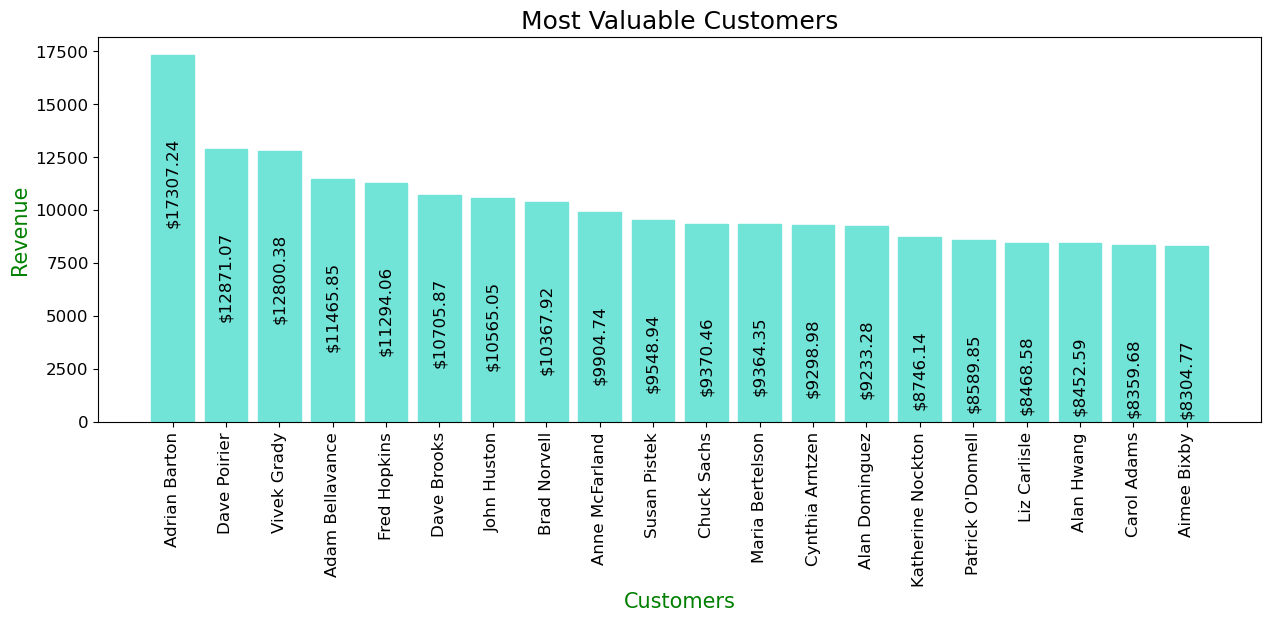

In [17]:
# width and height of figure is defined in inches
plt.figure(figsize = (15,5))
plt.title("Most Valuable Customers", fontsize=18, color= 'k') 
plt.bar(valuable_customers["Customer Name"], valuable_customers["Sales"], color= '#71E3D7',edgecolor='#71E3D7', linewidth = 1)

# x axis shows the customers
plt.xlabel("Customers",fontsize=15,color= 'green')  

# y axis shows the Profit
plt.ylabel("Revenue",fontsize=15,color= 'green') 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

#To show the exact Profit generated on the figure
for k,v in valuable_customers["Sales"].items(): 
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90, color='k', horizontalalignment='center');

**Adrian Barton** is the most valuable customer, followed by **Dave Proirier**. We can offer them a coupon or a discount on their future purchases. This information is valuable for making decisions related to customer relationship strategies."

## ***Let's find out top 15 states which  generated the highest Revenue!***

In [18]:
# Sort the States as per the sales
Top_states = df_with_postal_code_dropped.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(15) 

# Round off the Sales Value up to 2 decimal places
Top_states = Top_states[["Sales"]].round(2) 

# Since we have used groupby, we will have to reset the index to add the states into dataframe
Top_states.reset_index(inplace=True) 

C:\Users\barth\AppData\Local\Temp\ipykernel_25520\1302563010.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_states = df_with_postal_code_dropped.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(15)


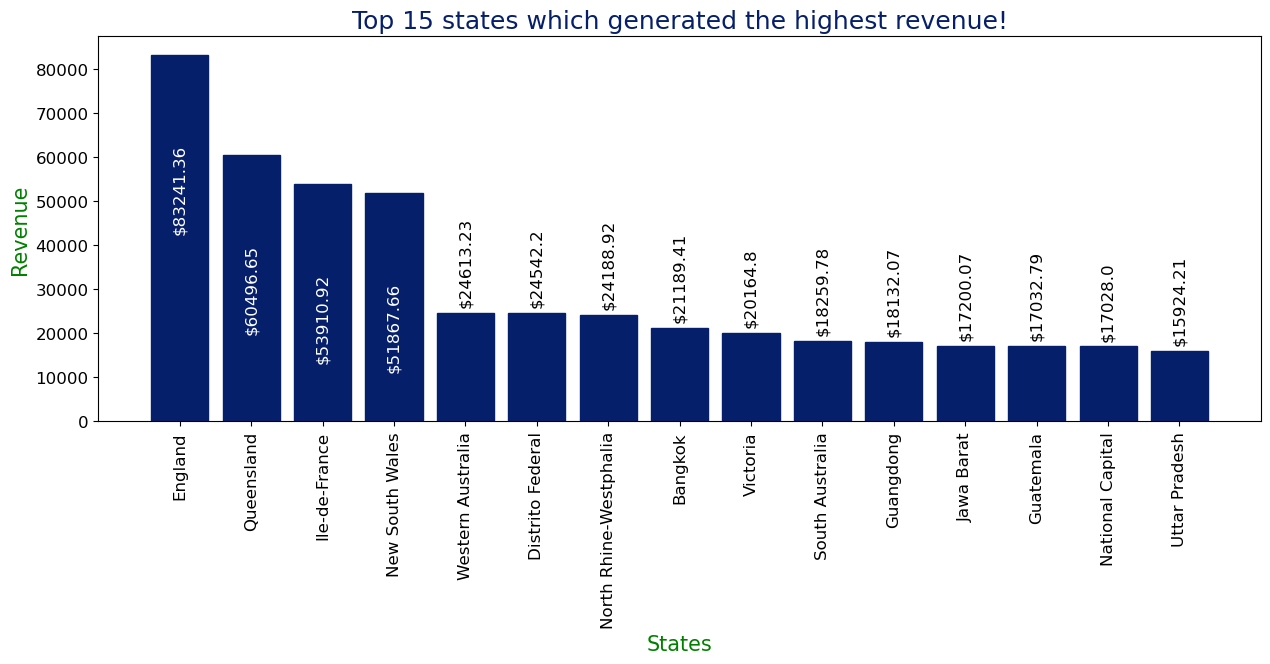

In [22]:
# width and height of figure is defined in inches
plt.figure(figsize = (15,5)) 
plt.title("Top 15 states which generated the highest revenue!", fontsize=18, color= '#061F6A') 
plt.bar(Top_states["State"], Top_states["Sales"],color= '#061F6A',edgecolor='#061F6A', linewidth = 1)

# x axis shows the States
plt.xlabel("States",fontsize=15, color= 'green') 

# y axis shows the Profit
plt.ylabel("Revenue",fontsize=15, color= 'green') 
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

#To show the exact profit generated on the figure
for k,v in Top_states["Sales"].items(): 
    if v>30000:
        plt.text(k,v-40000,'$'+ str(v), fontsize=12,rotation=90,color='w', horizontalalignment='center');
    else:
        plt.text(k,v+2000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');

## ***Let's find out top 15 cities which generated highest Revenue!***

In [20]:
# Sort the States as per the sales
Top_cities = df_with_postal_code_dropped.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(15) 

# Round off the Sales Value up to 2 decimal places
Top_cities = Top_cities[["Sales"]].round(2) 

# Since we have used groupby, we will have to reset the index to add the cities into the dataframe
Top_cities.reset_index(inplace=True) 

C:\Users\barth\AppData\Local\Temp\ipykernel_25520\2470593523.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_cities = df_with_postal_code_dropped.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(15)


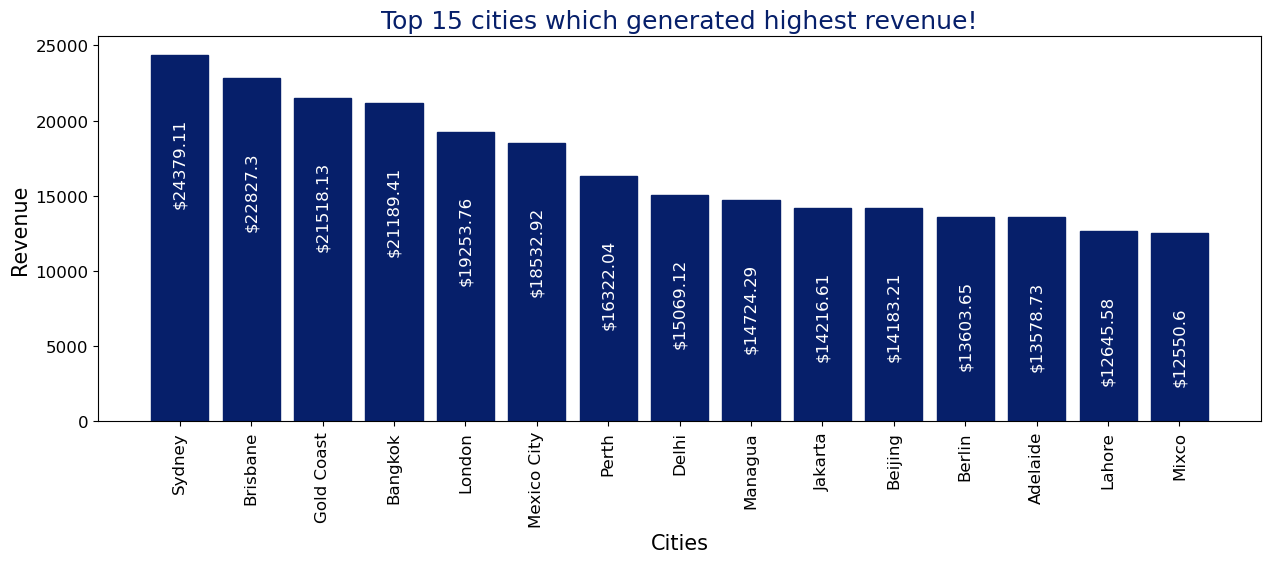

In [23]:
# width and height of figure is defined in inches
plt.figure(figsize = (15,5)) 
plt.title("Top 15 cities which generated highest revenue!", fontsize=18, color = "#061F6A")
plt.bar(Top_cities["City"], Top_cities["Sales"],color= '#061F6A',edgecolor='#061F6A', linewidth = 1)

 # x axis shows the States
plt.xlabel("Cities",fontsize=15) 

# y axis shows the Profit
plt.ylabel("Revenue",fontsize=15)  
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

#To show the exact Profit generated on the figure
for k,v in Top_cities["Sales"].items(): 
    if v>14000:
        plt.text(k,v-10000,'$'+ str(v), fontsize=12,rotation=90,color='w', horizontalalignment='center');
    else:
        plt.text(k,v-10000,'$'+ str(v), fontsize=12,rotation=90,color='w', horizontalalignment='center');


## Let's look at the revenue generated by each category!

In [24]:
# Sort the Categories as per the salesTop_category = 
Top_category = df_with_postal_code_dropped.groupby(["Category"]).sum().sort_values("Sales", ascending=False)  

# keep only the sales column in the dataframe
Top_category = Top_category[["Sales"]]

# To find the total re generated as per category
total_revenue_category = Top_category["Sales"].sum()

# Convert the total_revenue_category from float to int and then to string
total_revenue_category = str(int(total_revenue_category)) 

# Adding '$' sign before the Value
total_revenue_category = '$' + total_revenue_category 

# Since we have used groupby, we will have to reset the index to add the category into the dataframe
Top_category.reset_index(inplace=True) 

C:\Users\barth\AppData\Local\Temp\ipykernel_25520\1554261193.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_category = df_with_postal_code_dropped.groupby(["Category"]).sum().sort_values("Sales", ascending=False)


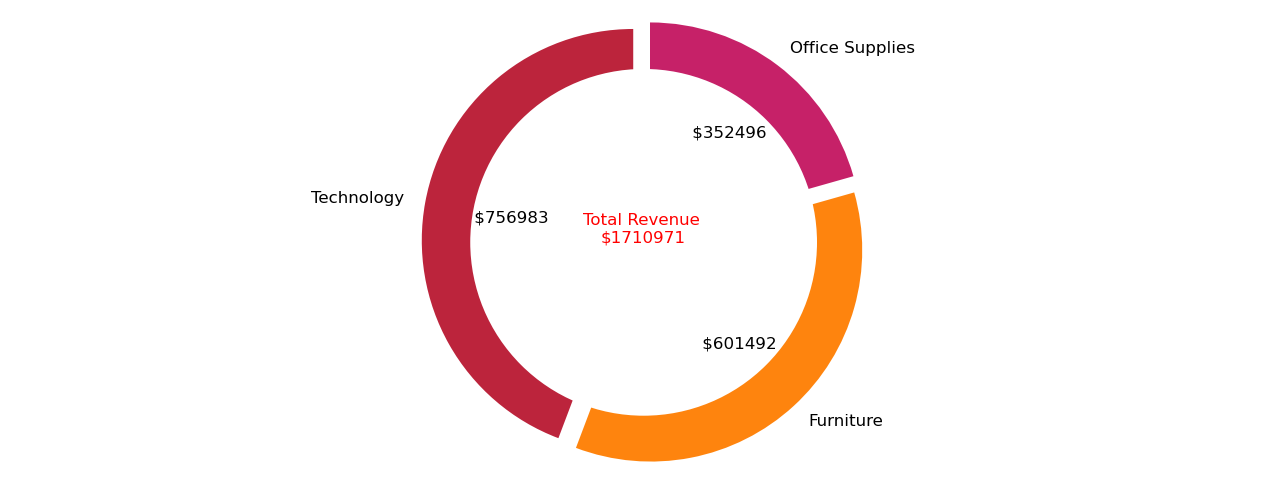

In [180]:
# width and height of figure is defined in inches
plt.rcParams["figure.figsize"] = (13,5)

# Font size is defined
plt.rcParams['font.size'] = 12.0

# Font weight is defined
plt.rcParams['font.weight'] = 6 

# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

# Colors are defined for the pie chart
colors = ['#BC243C','#FE840E','#C62168'] 
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], autopct= autopct_format(Top_category['Sales']), startangle=90,explode=explode)

# drawing a circle on the pie chart to make it look better 
centre_circle = plt.Circle((0,0),0.82,fc='white') 
fig = plt.gcf()

# Add the circle on the pie chart
fig.gca().add_artist(centre_circle) 

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 

# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

## Sales category segmentation

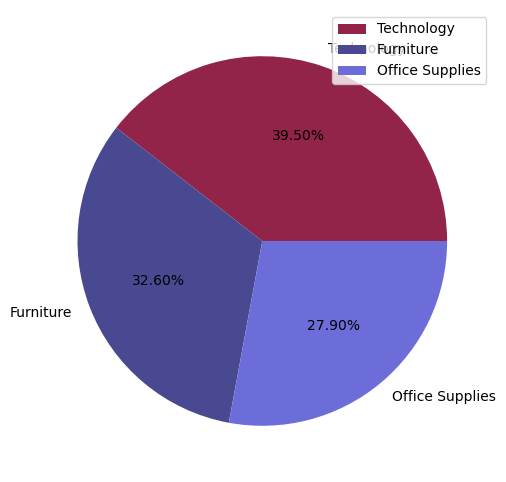

In [11]:
plt.figure(figsize=(8,6))

plt.pie(df_with_postal_code_dropped.Category.value_counts(), labels=df_with_postal_code_dropped.Category.value_counts().index, autopct='%.2f%%', colors=sns.color_palette('gist_stern'))
#plt.title('Grafik Persentase Kategori Penjualan Superstore 2012-2016')

plt.legend()
plt.show()

## Sales based on product sub category

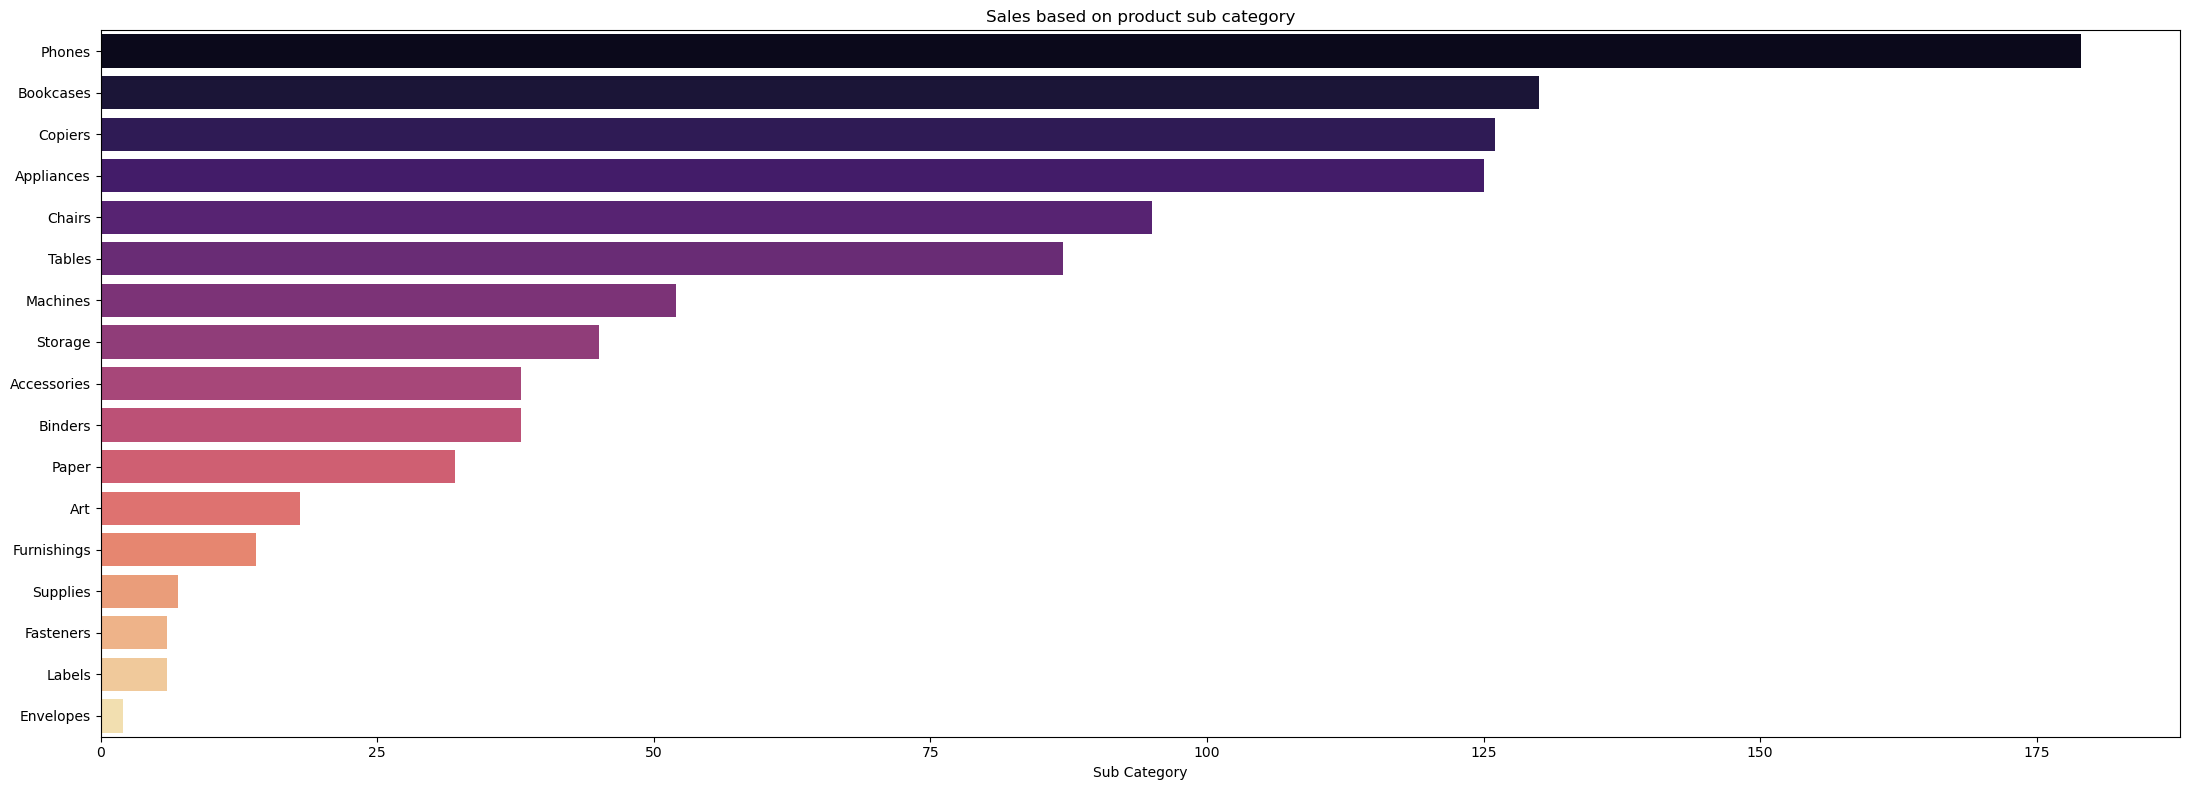

In [16]:
plt.figure(figsize=(22,8))

sns.barplot(x=df_with_postal_code_dropped["Sub-Category"].value_counts(), y=df_with_postal_code_dropped["Sub-Category"].value_counts().index, palette='magma')

plt.title('Sales based on product sub category')
plt.xlabel('Sub Category')


plt.tight_layout()
plt.show()

## 10 Countries with lowest sales

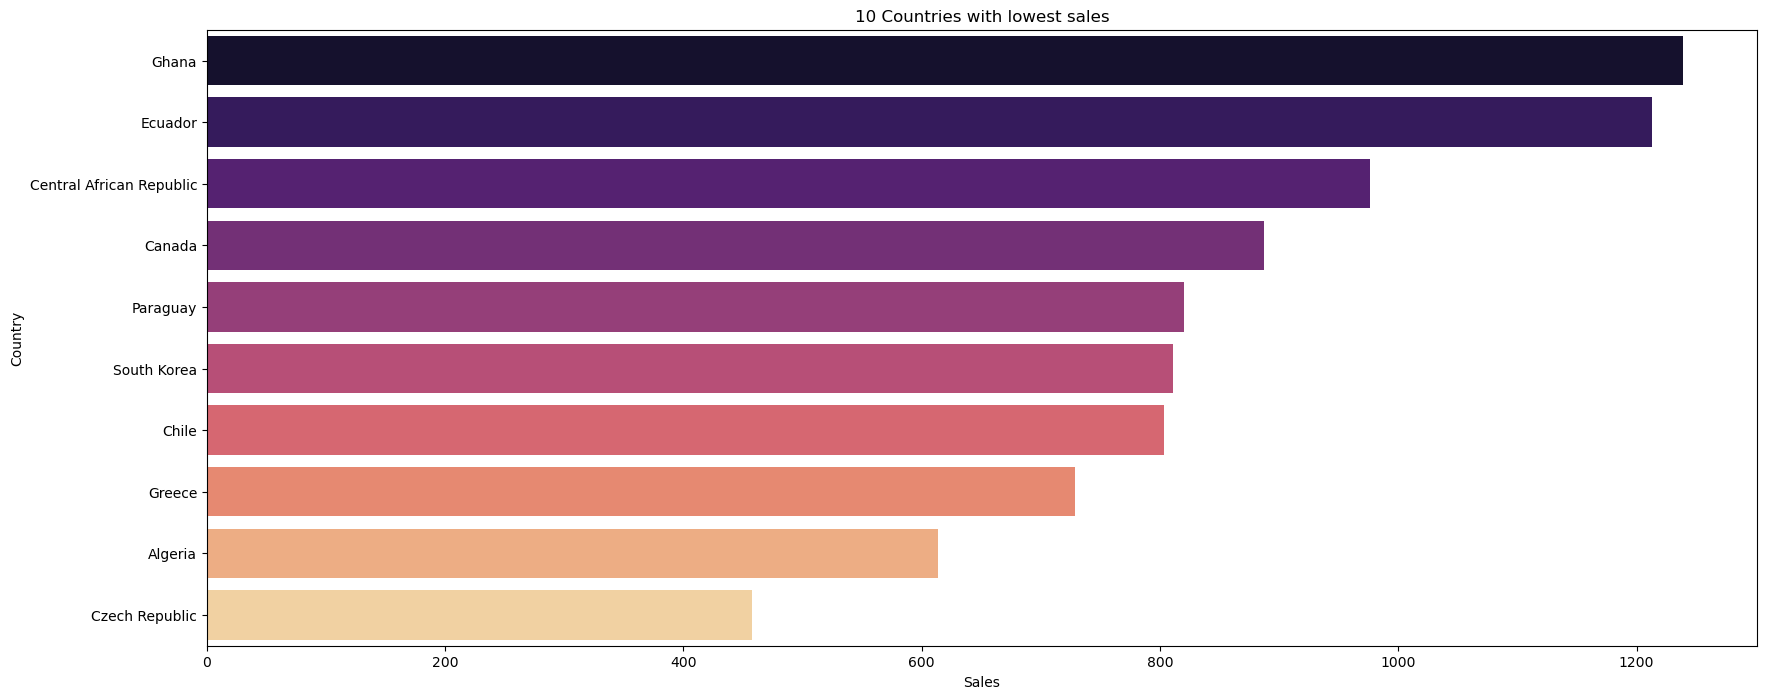

In [19]:
df_temp = df_with_postal_code_dropped[['Country', 'Sales']].groupby('Country').sum().reset_index().sort_values(by='Sales', ascending=False).tail(10)

plt.figure(figsize=(20,8))

sns.barplot(data=df_temp, x='Sales', y='Country', palette='magma')

plt.title('10 Countries with lowest sales')
plt.xlabel('Sales')

plt.show()